## Import libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import bigrams
from collections import Counter
from wordcloud import WordCloud
import collections, re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]

## Read the Dataset

In [59]:
true = pd.read_csv("~/Projects/TEDE/2/True.csv")
fake = pd.read_csv("~/Projects/TEDE/2/Fake.csv")

## Ερωτήματα

### 2.α

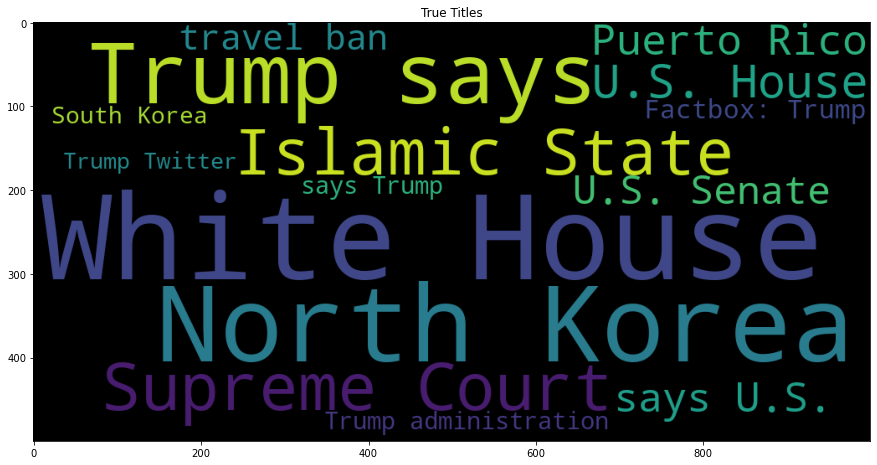

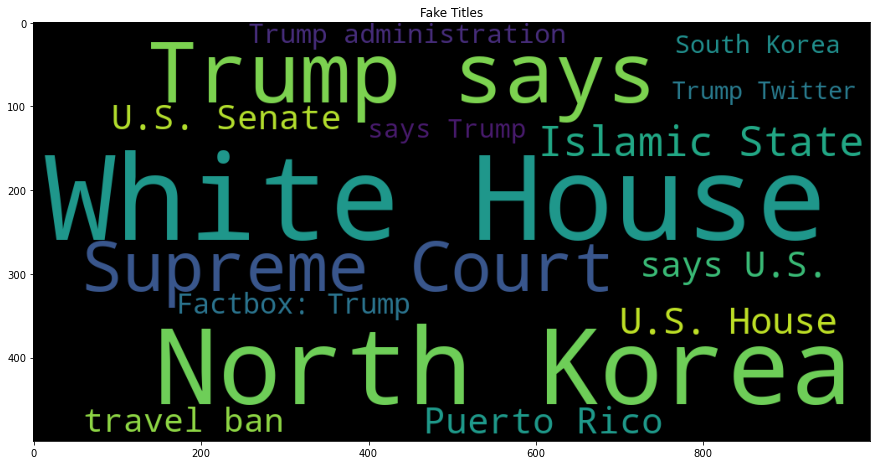

In [60]:
def ex_2a(n, dfSet, txt):

    stop = stopwords.words('english')
    dfFin = dfSet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    title_bigrams = dfFin.apply(lambda row: list(bigrams(row.split(' ')))).tolist()

    title_bigram_count = {}

    for line in title_bigrams:
        for word in line:
            full_word = word[0] + ' ' + word[1]

            if full_word in title_bigram_count:
                title_bigram_count[full_word] += 1
            else:
                title_bigram_count[full_word] = 0
    
    wordcloud = WordCloud(width = 1000, height = 500, max_words=n).generate_from_frequencies(title_bigram_count)

    plt.figure(figsize=(n,8))
    plt.title(txt)
    plt.imshow(wordcloud)
    plt.show()


true_df_A = true.dropna(subset=['title', 'text'])['title'] # drop Nan
ex_2a(15, true_df_A, "True Titles")

false_df_A = true.dropna(subset=['title', 'text'])['title'] # drop Nan
ex_2a(15, false_df_A, "Fake Titles")

### 2.β

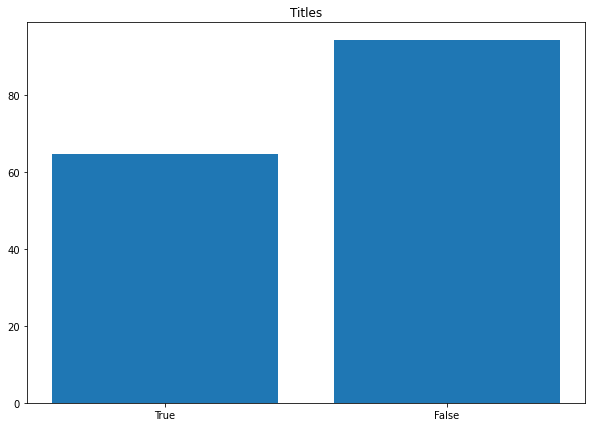

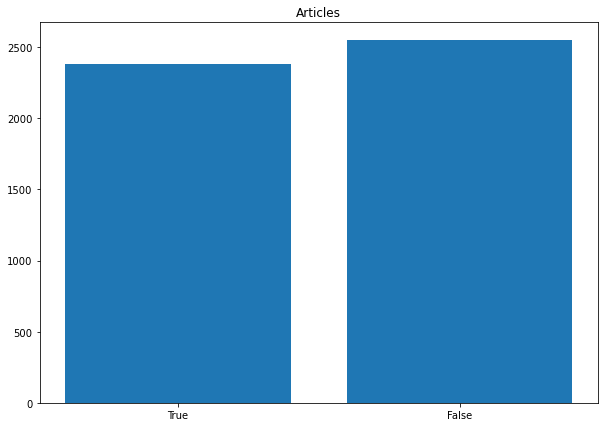

In [61]:
def ex_2b():

    stop = stopwords.words('english')

    true_df = true.dropna(subset=['title']) # drop Nan
    tcount=0
    for line in true_df['title']:
        tcount = tcount + len(line)

    tfin = tcount/len(true_df)

    false_df = fake.dropna(subset=['title']) # drop Nan
    tcount=0
    for line in false_df['title']:
        tcount = tcount + len(line)

    ffin = tcount/len(false_df)

    data = {'Values': [tfin, ffin]}
    labels= ("True", "False")

    plt.title("Titles")
    plt.bar(labels, data['Values'])
    plt.show()


    #####

    true_df = true.dropna(subset=['text']) # drop Nan
    tcount=0
    for line in true_df['text']:
        tcount = tcount + len(line)

    tfin = tcount/len(true_df)

    false_df = fake.dropna(subset=['text']) # drop Nan
    tcount=0
    for line in false_df['text']:
        tcount = tcount + len(line)

    ffin = tcount/len(false_df)

    data = {'Values': [tfin, ffin]}
    labels= ("True", "False")

    plt.title("Articles")
    plt.bar(labels, data['Values'])
    plt.show()
        
ex_2b()

### 2.γ

Fake titles and texts have more words.

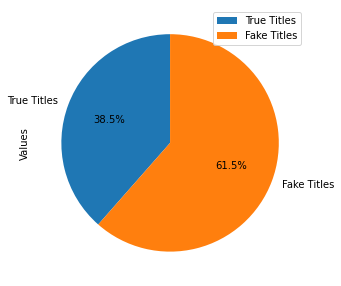

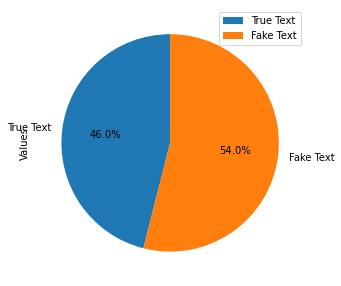

In [62]:
def ex_2c():

    true_df = true.dropna(subset=['title', 'text']) # drop Nan

    true_title = 0
    true_text = 0

    for row in true_df.iterrows():

        title = row[1]['title']
        true_title += len(title)

        text = row[1]['text']
        true_text += len(text)  

    fake_title = 0
    fake_text = 0

    fake_df = fake.dropna(subset=['title', 'text']) # drop Nan

    for row in fake_df.iterrows():

        title = row[1]['title']
        fake_title += len(title)

        text = row[1]['text']
        fake_text += len(text)

    data = {'Values': [true_title, fake_title]}
    df = pd.DataFrame(data,columns=['Values'],index = ['True Titles','Fake Titles'])

    df.plot.pie(y='Values',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
    plt.show()

    data = {'Values': [true_text, fake_text]}
    df = pd.DataFrame(data,columns=['Values'],index = ['True Text','Fake Text'])

    df.plot.pie(y='Values',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
    plt.show()

ex_2c()

### 2.δ

Fake titles and texts have more words.

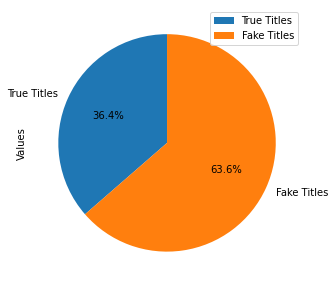

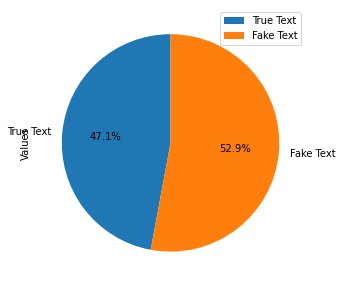

In [63]:
def ex_2d():

    stop = stopwords.words('english')

    true_df = true.dropna(subset=['title', 'text']) # drop Nan

    true_df['title_no_stopwords'] = true_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    title_list = true_df['title_no_stopwords'].tolist()

    true_df['text_no_stopwords'] = true_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    text_list = true_df['text_no_stopwords'].tolist()

    true_title = 0
    true_text = 0

    for i in title_list:
        true_title += len(i)
    
    for i in text_list:
        true_text += len(i)

    fake_title = 0
    fake_text = 0

    fake_df = fake.dropna(subset=['title', 'text']) # drop Nan
    
    fake_df['title_no_stopwords'] = fake_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    title_list = fake_df['title_no_stopwords'].tolist()

    fake_df['text_no_stopwords'] = fake_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    text_list = fake_df['text_no_stopwords'].tolist()

    for i in title_list:
        fake_title += len(i)

    for i in text_list:
        fake_text += len(i)

    data = {'Values': [true_title, fake_title]}
    df = pd.DataFrame(data,columns=['Values'],index = ['True Titles','Fake Titles'])

    df.plot.pie(y='Values',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
    plt.show()

    data = {'Values': [true_text, fake_text]}
    df = pd.DataFrame(data,columns=['Values'],index = ['True Text','Fake Text'])

    df.plot.pie(y='Values',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
    plt.show()

ex_2d()

### 2.ε

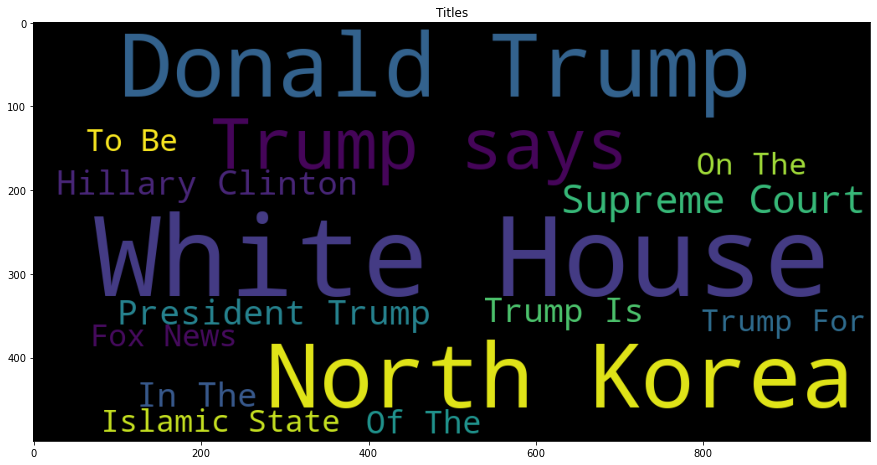

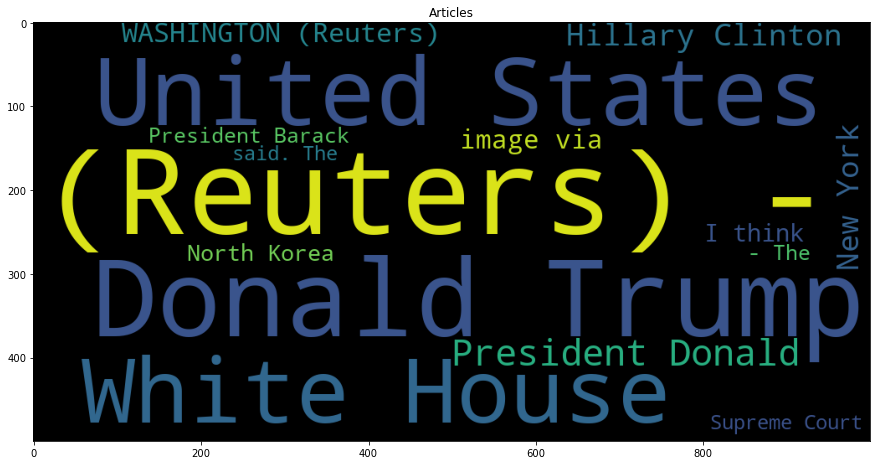

In [64]:
true_df_E = true.dropna(subset=['title', 'text']) # drop Nan

false_df_E = fake.dropna(subset=['title', 'text']) # drop Nan

x= pd.concat([false_df_E, true_df_E])
ex_2a(15, x['title'], "Titles")

ex_2a(15, x['text'], "Articles")

## 3

In [65]:
def ex_e():
    train_df = pd.DataFrame(columns=['title', 'text', 'subject', 'date', 'label'])
    test_df = pd.DataFrame(columns=['title', 'text', 'subject', 'date', 'label'])

    num_of_true_rows = len(true)
    num_of_rows_for_train = num_of_true_rows * 0.8

    true_no_nan = true.dropna(subset=['title', 'text']) # drop Nan
    fake_no_nan = fake.dropna(subset=['title', 'text']) # drop Nan

    for row in true_no_nan.iterrows():

        if num_of_rows_for_train > 0:
            train_df = train_df.append({'title': row[1]['title'], 'text': row[1]['text'], 'subject': row[1]['subject'], 'date': row[1]['date'], 'label': 1}, ignore_index=True)
            num_of_rows_for_train -= 1
        else:
            test_df = test_df.append({'title': row[1]['title'], 'text': row[1]['text'], 'subject': row[1]['subject'], 'date': row[1]['date'], 'label': 1}, ignore_index=True)

    num_of_fake_rows = len(fake)
    num_of_rows_for_train = num_of_fake_rows * 0.8

    for row in fake_no_nan.iterrows():

        if num_of_rows_for_train > 0:
            train_df = train_df.append({'title': row[1]['title'], 'text': row[1]['text'], 'subject': row[1]['subject'], 'date': row[1]['date'], 'label': 0}, ignore_index=True)
            num_of_rows_for_train -= 1
        else:
            test_df = test_df.append({'title': row[1]['title'], 'text': row[1]['text'], 'subject': row[1]['subject'], 'date': row[1]['date'], 'label': 0}, ignore_index=True)

    # TODO: Delete this.
    train_df_len = len(train_df);
    test_df_len = len(test_df);

    train_df = train_df.sample(n=int(train_df_len * 0.1))
    test_df = test_df.sample(n=int(test_df_len * 0.1))
 
    train_df.to_csv('~/Projects/TEDE/2/train.csv')
    test_df.to_csv('~/Projects/TEDE/2/test.csv')

ex_e()

## 2

Read the train and test datasets.

In [71]:
def ex_read_train_test():
    train = pd.read_csv("~/Projects/TEDE/2/train.csv")
    test = pd.read_csv("~/Projects/TEDE/2/test.csv")

    return (train, test)
train_df, test_df = ex_read_train_test()

Get the bag of words.

In [67]:
def ex_get_bow():
    train_text_list = train_df['text'].tolist()
    test_text_list = test_df['text'].tolist()

    # Create a Vectorizer Object
    vectorizer = CountVectorizer(stop_words='english', max_df=0.8, min_df=2, strip_accents='ascii', max_features=8000)
    
    train_bagsofwords = vectorizer.fit_transform(train_text_list).toarray()
    test_bagsofwords = vectorizer.fit_transform(test_text_list).toarray()
    
    return (train_bagsofwords, test_bagsofwords)

train_bow, test_bow = ex_get_bow()

In [68]:
def ex_get_tfidf():

    train_text_list = train_df['text'].tolist()    
    test_text_list = test_df['text'].tolist()    

    tfIdfV = TfidfVectorizer(use_idf=True, stop_words='english', max_df=0.8, min_df=2, strip_accents='ascii', max_features=5000)

    train_tf_idf = tfIdfV.fit_transform(train_text_list).toarray()
    test_tf_idf = tfIdfV.fit_transform(test_text_list).toarray()

    return (train_tf_idf, test_tf_idf)

train_tf_idf, test_tf_idf = ex_get_tfidf()

In [72]:
def ex_get_word2vec():
    train_tokens = train_df['text']
    train_tokenize = [each.split() for each in train_tokens]
    
    test_tokens = test_df['text']
    test_tokenize = [each.split() for each in test_tokens]

    train_model_w2v = Word2Vec(train_tokenize, vector_size=200, window=5, min_count=2, sg=1, negative=10, workers=12, seed=34)
    test_model_w2v = Word2Vec(test_tokenize, vector_size=200, window=5, min_count=2, sg=1, negative=10, workers=12, seed=34)

    train_model_w2v.train(train_tokenize, total_examples=len(train_df), epochs=20)
    test_model_w2v.train(test_tokenize, total_examples=len(test_df), epochs=20)

    return (train_model_w2v, test_model_w2v)

train_word2vec, test_word2vec = ex_get_word2vec()

In [79]:
def ex_logistic_regression():
    ml_model = LogisticRegression(C = 100, random_state = 0, solver='liblinear')
    ml_model.fit(train_bow, train_df['label'].tolist())

    prediction = ml_model.predict(test_bow)

    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("bow F1 score =", f1score * 100, '%')
    print("bow accuracy score =", acc_score * 100, '%')

    ml_model = LogisticRegression(C = 100, random_state = 0, solver='liblinear')
    ml_model.fit(train_tf_idf, train_df['label'].tolist())

    prediction = ml_model.predict(test_tf_idf)
    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("tf_idf F1 score =", f1score * 100, '%')
    print("tf_idf accuracy score =", acc_score * 100, '%')

ex_logistic_regression()

bow F1 score = 34.90398613402329 %
bow accuracy score = 50.055741360089186 %
tf_idf F1 score = 35.30225698943135 %
tf_idf accuracy score = 50.50167224080268 %


In [77]:
def ex_naive_bayes():
    ml_model = MultinomialNB()
    ml_model.fit(train_bow, train_df['label'].tolist())

    prediction = ml_model.predict(test_bow)

    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("bow F1 score =", f1score * 100, '%')
    print("bow accuracy score =", acc_score * 100, '%')

    ml_model = MultinomialNB()
    ml_model.fit(train_tf_idf, train_df['label'].tolist())

    prediction = ml_model.predict(test_tf_idf)

    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("tf_idf F1 score =", f1score * 100, '%')
    print("tf_idf F1 score =", acc_score * 100, '%')

ex_naive_bayes()

bow F1 score = 50.09915425921998 %
bow accuracy score = 51.50501672240802 %
tf_idf F1 score = 55.32684300155647 %
tf_idf F1 score = 56.187290969899664 %
